# Smoothing with PySINDy.
A short example showing how to use the PySINDy functions to smooth neural signals.

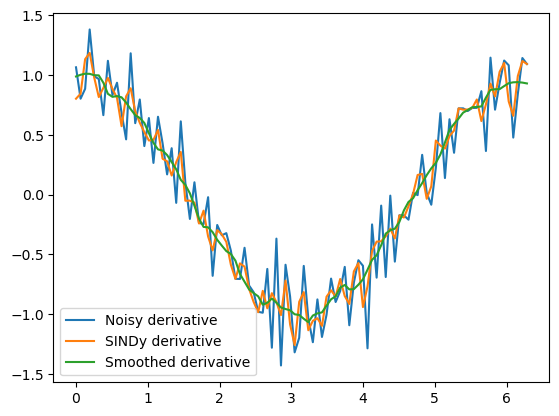

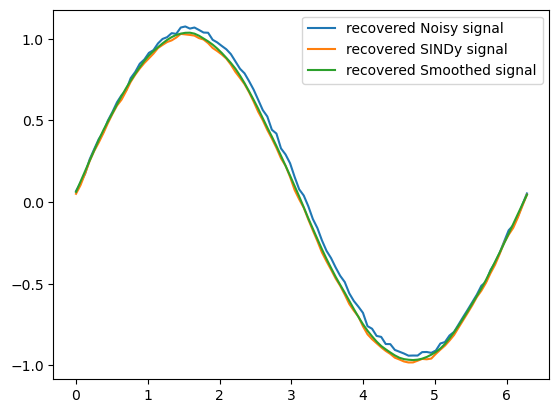

In [57]:
import numpy as np
from pysindy import differentiation

# Generate noisy data
t = np.linspace(0, 2 * np.pi, 100)
x_orig = np.sin(t)
x_noisy = x_orig + np.random.normal(scale=0.01, size=t.size)

# Apply different derivatives (forward first difference)
dt = np.diff(t, prepend=t[0] - np.diff(t)[0])

# True empirical derivative (first difference)
dxdt_orig = np.diff(x_orig, prepend=x_orig[0] - np.diff(x_orig)[0]) / dt

# Noisy empirical derivative (first difference)
dxdt_noisy = np.diff(x_noisy, prepend=x_orig[0] - np.diff(x_orig)[0]) / dt

# SINDy derivative (second difference)
diff = differentiation.SINDyDerivative()
dxdt_sindy = diff._differentiate(x_noisy, t)

# Smoothed finite difference derivative
diff = differentiation.SmoothedFiniteDifference()
dxdt_smooth = diff._differentiate(x_noisy, t)

# Plot results
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# ax.plot(t, dxdt_orig, label="True derivative")
ax.plot(t, dxdt_noisy, label="Noisy derivative")
ax.plot(t, dxdt_sindy, label="SINDy derivative")
ax.plot(t, dxdt_smooth, label="Smoothed derivative")
ax.legend()
plt.show()

# Integrate to recover signal
fig, ax = plt.subplots()
# ax.plot(t, np.cumsum(dxdt_orig) * dt, label="recovered True signal")
ax.plot(t, np.cumsum(dxdt_noisy) * dt, label="recovered Noisy signal")
ax.plot(t, np.cumsum(dxdt_sindy) * dt, label="recovered SINDy signal")
ax.plot(t, np.cumsum(dxdt_smooth) * dt, label="recovered Smoothed signal")
ax.legend()
plt.show()
